In [1]:
import magnet as mag

from magnet.training.callbacks import Monitor

Running your code on a slow, boring CPU.
Make some money and buy yourself a GPU, will ya?

Pro Tip: If you're a poor old hag like me, use a cloud provider.


In [2]:
import torch

In [3]:
from copywriter.nlp import get_nlp, idx_word
from copywriter.models import EncoderReadymade, Decoder
from copywriter.hparams import (seq_len, encoder_dim, vocab_size, num_workers,
                                hidden_sizes, embedding_dim, batch_size)

In [4]:
jtplot_style()

In [5]:
DIR_CHECKPOINTS = DIR_MAIN / 'checkpoints'

In [6]:
def sample(sentence):
    n = seq_len
    sentence = nlp(sentence)
    sentence = [sentence[i: i + n].text for i in range(0, len(sentence) - n, n)]
    z = encoder.encode(sentence)
    z = torch.tensor(z).to(mag.device)
    y = decoder(z)
    y = y[:, :-1].max(1)[1]
    print(' '.join(' '.join(idx_word(i.item(), nlp) for i in y_j) for y_j in y))

In [7]:
monitor = Monitor()

In [8]:
monitor.load_state(DIR_CHECKPOINTS / 'trainer' / 'callbacks')

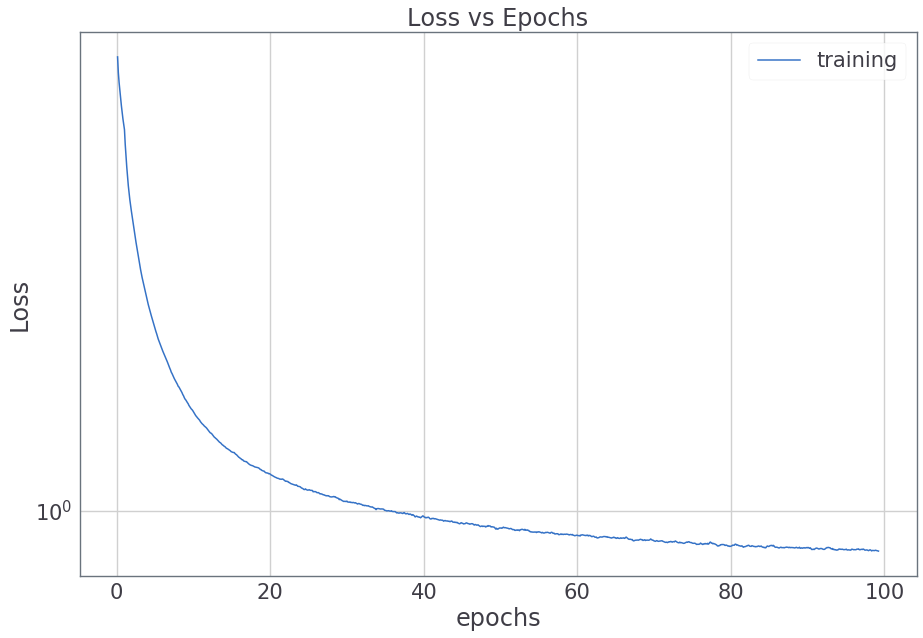

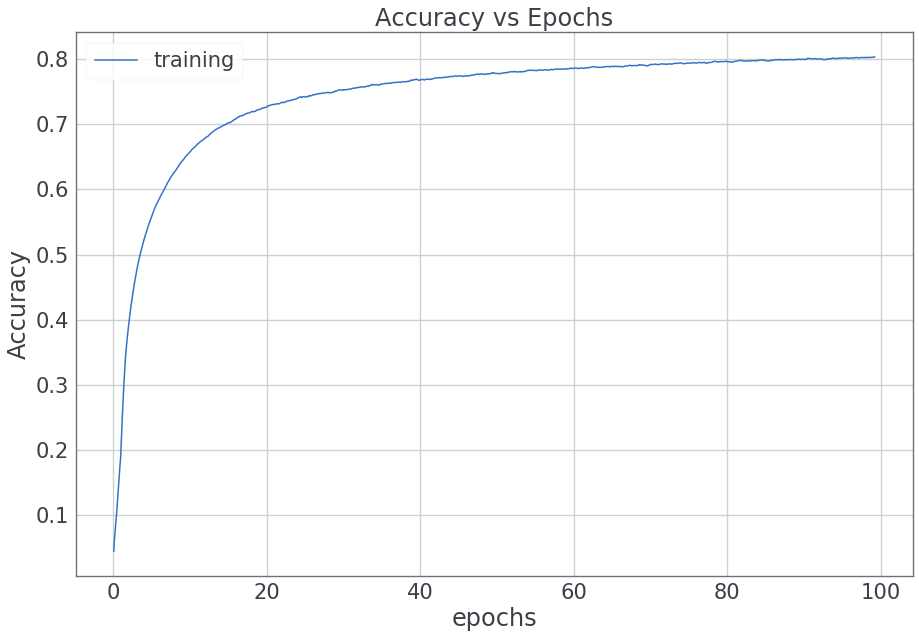

In [9]:
monitor.history.show('loss', log=True, x_key='epochs')
monitor.history.show('accuracy', x_key='epochs')

In [10]:
nlp = get_nlp('en_core_web_lg', vocab_size, DIR_CHECKPOINTS / 'vocab')

In [11]:
encoder = EncoderReadymade(vocab_size).to(mag.device)

Vocab size : 10000


In [13]:
decoder = Decoder(encoder_dim, hidden_sizes, vocab_size + 1, seq_len).to(mag.device)
device = 'cuda' if mag.device == 'cuda:0' else 'cpu'
decoder.load_state_dict(torch.load(DIR_CHECKPOINTS / 'trainer/models/0.pt', map_location=device))
decoder.eval()

Decoder(
  (fc): Linear(in_features=4096, out_features=5000, bias=True)
  (convs): ModuleList(
    (0): Conv1d(1000, 1000, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): Conv1d(1000, 10001, kernel_size=(3,), stride=(1,), padding=(1,))
  )
)

In [16]:
sample("any players and analysts consider Federer the greatest tennis player of all time.[213][214][215][216][217] He has also been called the greatest athlete of his generation.[218][219] Tennis.com listed him as the greatest male player of the open era.[220]"
"He dominated the game at his peak and has won more Grand Slam tournament titles (20) than any other men's singles player.[221][222] He is also the first men's singles player to have reached ten consecutive Grand Slam tournament finals and a total of 30 Grand Slam finals.[223] He has earned a men's doubles gold medal, and a men's single silver medal at the Olympics in 2008 and 2012, respectively.[224] He has spent the most amount of time in the Open Era at the top of the ATP Rankings (308 weeks). He also holds the record for the most titles (6) at the year-end tournament, where only the year-end eight highest-ranked players participate. Federer was ranked among the top eight players in the world continuously for 14 years and two weeks—from 14 October 2002 until 31 October 2016, when injuries forced him to skip much of the 2016 season.[225]"

"Federer has won the ATPWorldTour.com Fans' Favourite Award a record 15 times consecutively (2003–17), won the ATP Player of the Year five times (2004–07, 2009), become ITF World Champion five times (2004–07, 2009), and won the Stefan Edberg Sportsmanship Award (voted for by the players) a record 13 times (2004–09, 2011–17),[226] both being awards indicative of respect and popularity. He also won the Arthur Ashe Humanitarian of the Year Award twice (2006, 2013), the Laureus World Sportsman of the Year five times (2005–08, 2018), and the Laureus World Comeback of the Year once, following his 2017 renaissance.[227] Federer is at times known as the Federer Express,[228] shortened to Fed Express or FedEx, and Swiss Maestro,[228] or just Maestro.[228][229][230][231]"

"Federer is one of the founders, via his management company TEAM8, of the Laver Cup; the annual team tennis tournament which pits Europe against the rest of the world. He co-founded the tournament in honor of tennis legend Rod Laver and the inaugural edition was played in 2017."

"In 2018, Federer returned to the Australian Open to defend his 2017 title and won his 20th Grand Slam tournament. This win placed him a total of four major titles ahead of long-time rival Rafael Nadal, who had won 16 Grand Slam tournaments. However, Nadal winning the 2018 French Open narrowed the gap back to three. ")

/home/vaisakh/copywriter/InferSent/models.py:222: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  sentences[stidx:stidx + bsize]), volatile=True)


any investors teams show represent the glorious at industries area that we . : 's has has been by the since the . : – ] shows mentioned as Quickmeme the mainstream largest female is that , . 's the day at day height and has " 130 . Long matches shot # ( ( than any other listing is pages , . that is also the first leaders 's thousand words to be reached 15 Ten area ever been race and a % of the Years . . ] has has made a holidays 's its tourists , - and his gets boss 's fields at at the Ontario in in , 2008 , . . . has got the most amount of time in the the at - the top of of the ( ( 12 ) ) . He he holds the rate for the most 2016 ( 2 2 at the 50/50 ) of , , where the the the the - discussed - - goes teams expect . It was rated among the top 12 size in the world controlled for 10 years and two 15 und Stephen , December lab 24 June , 2015 , when 2007 like from to miss count of the . . has will the ' fans ? guide : a record 130 15 times ( ( ) , won the image of of the seven 10 eight times